# Factory, model answer

First we import the libraries, adding DoENUT in as a path, alternatively, you could copy `doenut.py` into this directory.

In [2]:
# first we import our libraries:

import sys
sys.path.append(r"C:\Users\eg16993\OneDrive - University of Bristol\Documents\GitHub\doenut")
import pandas as pd
sys.path.append(r"C:\Users\ella_\OneDrive - University of Bristol\Documents\GitHub\doenut")

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import doenut

#### 1. Load in our data

In [3]:
df=pd.read_csv('factory_run_1_results.csv')
df

,RUN,PRESSURE,TEMP,CATALYST,FLOW RATE,PURGE,COOLING,NH3 YIELD,TIME TO,TOTAL COST,TOTAL OUTPUT,NET PROFIT,FACTORY
0,NaN,(ATM),(OC),(QUALITY),(VO),(%),(OC),(%),EQUILIBRATE,PER TON,(TONS/DAY),($),STATUS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(MIN),($/TON),NaN,NaN,NaN
2,1.0,200,300,BEST,10800,0%,-150,11.52,34.09,298.31,161.05,"$10,901",RUNNING
3,2.0,950,300,BEST,10800,0%,-30,17.01,220.36,NO OUTPUT!,0,"-$12,000",SHUTDOWN!
4,3.0,200,600,BEST,10800,0%,-30,2.01,>0.01,521.8,33.52,"-$5,222",RUNNING
5,4.0,950,600,BEST,10800,0%,-150,5.85,>0.01,273.01,243.85,"$22,675",RUNNING
6,5.0,200,300,BEST,16800,0%,-30,11.52,34.09,NO OUTPUT!,0,"-$12,000",SHUTDOWN!
7,6.0,950,300,BEST,16800,0%,-150,17.01,220.36,254.48,486.23,"$54,224",RUNNING
8,7.0,200,600,BEST,16800,0%,-150,2.01,>0.01,423.41,61.98,"-$3,558",RUNNING
9,8.0,950,600,BEST,16800,0%,-30,5.85,>0.01,574.93,29.62,"-$6,188",RUNNING


## 2. Clean up the data

Only, lines 2-19 contain actual data. Also, at the same time, lets split our data into inputs and results.

We have two targets, the final target, which is the profit per day and yeild, which gives us some information even when no ammonia was captured and produced.

In [4]:
df.columns

Index(['RUN', 'PRESSURE', 'TEMP', 'CATALYST', 'FLOW RATE', 'PURGE', 'COOLING',
       'NH3 YIELD', 'TIME TO', 'TOTAL COST', 'TOTAL OUTPUT', 'NET PROFIT',
       'FACTORY'],
      dtype='object')

In [5]:
purge_list=[0,0]
for experiment in range(len(df)):
    if experiment > 1:
        purge = float(df['PURGE'][experiment].split('%')[0])
        purge_list.append(purge)

print(purge_list)

[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 15.0]


In [6]:
pl_list = [0, 0]
for experiment in range(len(df)):
    if experiment > 1:
        b = df['NET PROFIT'][experiment].split(',')[-1]
        a = df['NET PROFIT'][experiment].split(',')[0].split('$')
        a=''.join(a)
        pl = float(''.join([a,b]))
        pl_list.append(pl)
        
pl_list

[0,
 0,
 10901.0,
 -12000.0,
 -5222.0,
 22675.0,
 -12000.0,
 54224.0,
 -3558.0,
 -6188.0,
 5264.0,
 -12000.0,
 -6395.0,
 14140.0,
 -12000.0,
 37206.0,
 -5727.0,
 -7225.0,
 25032.0]

In [7]:
[float(x) for x in df['TEMP'][2:]]

[300.0,
 300.0,
 600.0,
 600.0,
 300.0,
 300.0,
 600.0,
 600.0,
 300.0,
 300.0,
 600.0,
 600.0,
 300.0,
 300.0,
 600.0,
 600.0,
 450.0]

In [8]:
# this makes a new dataframe called inputs
inputs = pd.DataFrame({
    'P': [float(x) for x in df['PRESSURE'][2:]],
    'Temp.': [float(x) for x in df['TEMP'][2:]],
    'Flow': [float(x) for x in df['FLOW RATE'][2:]],
    'Purge': purge_list[2:],
    'Cool': [float(x) for x in df['COOLING'][2:]]})
#inputs.reset_index()
# this makes a new dataframe called responses

responses = pd.DataFrame({'Yield':  [float(x) for x in df[df.columns[7]][2:]],
                        'Profit': pl_list[2:]})
#responses.reset_index()

In [9]:
orig_inputs = inputs
factor_list = orig_inputs.columns

factor_list

Index(['P', 'Temp.', 'Flow', 'Purge', 'Cool'], dtype='object')

Have a look at the dataframes:

In [10]:
inputs

,P,Temp.,Flow,Purge,Cool
0,200.0,300.0,10800.0,0.0,-150.0
1,950.0,300.0,10800.0,0.0,-30.0
2,200.0,600.0,10800.0,0.0,-30.0
3,950.0,600.0,10800.0,0.0,-150.0
4,200.0,300.0,16800.0,0.0,-30.0
5,950.0,300.0,16800.0,0.0,-150.0
6,200.0,600.0,16800.0,0.0,-150.0
7,950.0,600.0,16800.0,0.0,-30.0
8,200.0,300.0,10800.0,25.0,-150.0
9,950.0,300.0,10800.0,25.0,-30.0


In [11]:
responses

,Yield,Profit
0,11.52,10901.0
1,17.01,-12000.0
2,2.01,-5222.0
3,5.85,22675.0
4,11.52,-12000.0
5,17.01,54224.0
6,2.01,-3558.0
7,5.85,-6188.0
8,11.52,5264.0
9,17.01,-12000.0


In [12]:
original_model, inputs_used, original_model_R2, predictions = doenut.train_model(
    inputs, 
    responses['Profit'], 
    test_responses=None,
    do_scaling_here=False,
    fit_intercept=True,
    verbose=True)

R squared for this model is 0.64


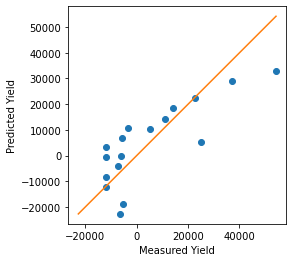

In [13]:
doenut.plot_observed_vs_predicted(responses['Profit'], 
                               predictions,
                               range_x=[],
                               label='Yield')

Input terms are ['P', 'Temp.', 'Flow', 'Purge', 'Cool']
Input Responses are ['Profit']

Selected Response is Profit
Selected input terms:	['P', 'Temp.', 'Flow', 'Purge', 'Cool']
Averaging replicates
Input data is 17 points long
We are using 17 data points
Left out data point 0:	R2 = 0.641	Ave. Error = -5.59e+03
Left out data point 1:	R2 = 0.687	Ave. Error = -2.47e+04
Left out data point 2:	R2 = 0.682	Ave. Error = 2.16e+04
Left out data point 3:	R2 = 0.62	Ave. Error = 4.69e+02
Left out data point 4:	R2 = 0.625	Ave. Error = -6.07e+03
Left out data point 5:	R2 = 0.584	Ave. Error = 3.39e+04
Left out data point 6:	R2 = 0.689	Ave. Error = -2.27e+04
Left out data point 7:	R2 = 0.642	Ave. Error = -9.51e+03
Left out data point 8:	R2 = 0.647	Ave. Error = -8.24e+03
Left out data point 9:	R2 = 0.657	Ave. Error = -1.83e+04
Left out data point 10:	R2 = 0.702	Ave. Error = 2.59e+04
Left out data point 11:	R2 = 0.64	Ave. Error = -6.8e+03
Left out data point 12:	R2 = 0.621	Ave. Error = 2.27e+02
Left out

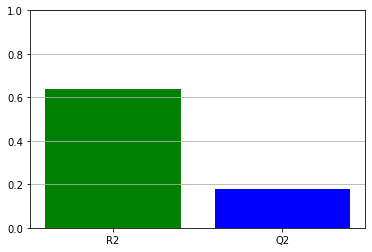

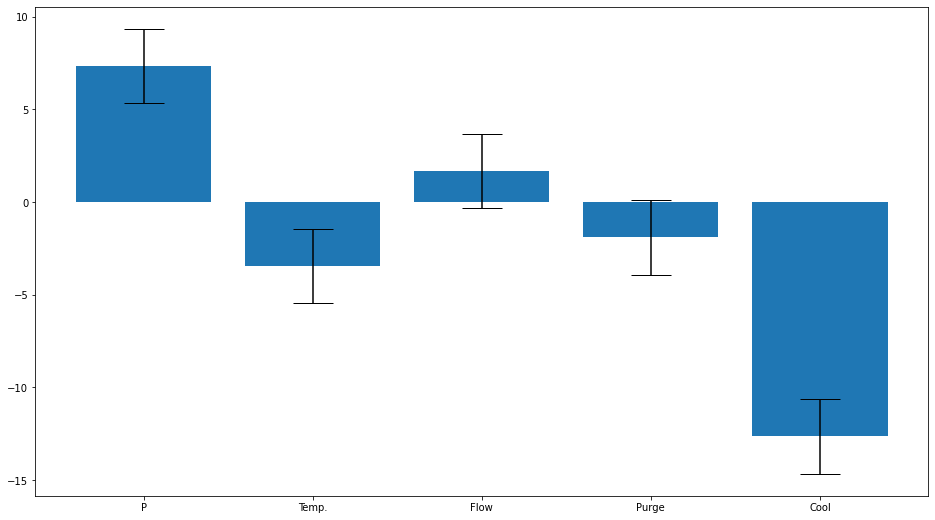

In [14]:
input_selector = range(len(inputs.columns))
this_model, R2, temp_tuple, _ = doenut.calulate_R2_and_Q2_for_models(
                        inputs, 
                        responses[['Profit']], 
                       # input_selector=[2,3,6,7], 
                        input_selector=input_selector, 
                        response_selector=[0],
                        use_scaled_inputs=True,
                        do_scaling_here=True)
new_model, predictions, ground_truth, coeffs, R2s, R2, Q2= temp_tuple

In [15]:
orig_inputs

,P,Temp.,Flow,Purge,Cool
0,200.0,300.0,10800.0,0.0,-150.0
1,950.0,300.0,10800.0,0.0,-30.0
2,200.0,600.0,10800.0,0.0,-30.0
3,950.0,600.0,10800.0,0.0,-150.0
4,200.0,300.0,16800.0,0.0,-30.0
5,950.0,300.0,16800.0,0.0,-150.0
6,200.0,600.0,16800.0,0.0,-150.0
7,950.0,600.0,16800.0,0.0,-30.0
8,200.0,300.0,10800.0,25.0,-150.0
9,950.0,300.0,10800.0,25.0,-30.0


In [16]:
sat_source_list = []
source_list = []
sat_inputs_orig, sat_source_list = doenut.add_higher_order_terms(inputs,
                          add_squares=True,
                          add_interactions=True,
                          column_list=[],
                          verbose= False)

In [17]:
sat_inputs_orig

,P,Temp.,Flow,Purge,Cool,P**2,Temp.**2,Flow**2,Purge**2,Cool**2,P*Temp.,P*Flow,P*Purge,P*Cool,Temp.*Flow,Temp.*Purge,Temp.*Cool,Flow*Purge,Flow*Cool,Purge*Cool
0,200.0,300.0,10800.0,0.0,-150.0,40000.0,90000.0,116640000.0,0.0,22500.0,60000.0,2160000.0,0.0,-30000.0,3240000.0,0.0,-45000.0,0.0,-1620000.0,-0.0
1,950.0,300.0,10800.0,0.0,-30.0,902500.0,90000.0,116640000.0,0.0,900.0,285000.0,10260000.0,0.0,-28500.0,3240000.0,0.0,-9000.0,0.0,-324000.0,-0.0
2,200.0,600.0,10800.0,0.0,-30.0,40000.0,360000.0,116640000.0,0.0,900.0,120000.0,2160000.0,0.0,-6000.0,6480000.0,0.0,-18000.0,0.0,-324000.0,-0.0
3,950.0,600.0,10800.0,0.0,-150.0,902500.0,360000.0,116640000.0,0.0,22500.0,570000.0,10260000.0,0.0,-142500.0,6480000.0,0.0,-90000.0,0.0,-1620000.0,-0.0
4,200.0,300.0,16800.0,0.0,-30.0,40000.0,90000.0,282240000.0,0.0,900.0,60000.0,3360000.0,0.0,-6000.0,5040000.0,0.0,-9000.0,0.0,-504000.0,-0.0
5,950.0,300.0,16800.0,0.0,-150.0,902500.0,90000.0,282240000.0,0.0,22500.0,285000.0,15960000.0,0.0,-142500.0,5040000.0,0.0,-45000.0,0.0,-2520000.0,-0.0
6,200.0,600.0,16800.0,0.0,-150.0,40000.0,360000.0,282240000.0,0.0,22500.0,120000.0,3360000.0,0.0,-30000.0,10080000.0,0.0,-90000.0,0.0,-2520000.0,-0.0
7,950.0,600.0,16800.0,0.0,-30.0,902500.0,360000.0,282240000.0,0.0,900.0,570000.0,15960000.0,0.0,-28500.0,10080000.0,0.0,-18000.0,0.0,-504000.0,-0.0
8,200.0,300.0,10800.0,25.0,-150.0,40000.0,90000.0,116640000.0,625.0,22500.0,60000.0,2160000.0,5000.0,-30000.0,3240000.0,7500.0,-45000.0,270000.0,-1620000.0,-3750.0
9,950.0,300.0,10800.0,25.0,-30.0,902500.0,90000.0,116640000.0,625.0,900.0,285000.0,10260000.0,23750.0,-28500.0,3240000.0,7500.0,-9000.0,270000.0,-324000.0,-750.0


Selected input terms:	['P', 'Temp.', 'Flow', 'Purge', 'Cool', 'P**2', 'Temp.**2', 'Flow**2', 'Purge**2', 'Cool**2', 'P*Temp.', 'P*Flow', 'P*Purge', 'P*Cool', 'Temp.*Flow', 'Temp.*Purge', 'Temp.*Cool', 'Flow*Purge', 'Flow*Cool', 'Purge*Cool']
Averaging replicates
Input data is 17 points long
We are using 17 data points
Left out data point 0:	R2 = 0.995	Ave. Error = -2.96e+03
Left out data point 1:	R2 = 0.997	Ave. Error = -8.96e+03
Left out data point 2:	R2 = 0.999	Ave. Error = 1.24e+04
Left out data point 3:	R2 = 0.994	Ave. Error = -4.76e+02
Left out data point 4:	R2 = 0.994	Ave. Error = -4.76e+02
Left out data point 5:	R2 = 0.999	Ave. Error = 1.24e+04
Left out data point 6:	R2 = 0.997	Ave. Error = -8.96e+03
Left out data point 7:	R2 = 0.995	Ave. Error = -2.96e+03
Left out data point 8:	R2 = 0.995	Ave. Error = 2.96e+03
Left out data point 9:	R2 = 0.997	Ave. Error = 8.96e+03
Left out data point 10:	R2 = 0.999	Ave. Error = -1.24e+04
Left out data point 11:	R2 = 0.994	Ave. Error = 4.76e+02

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

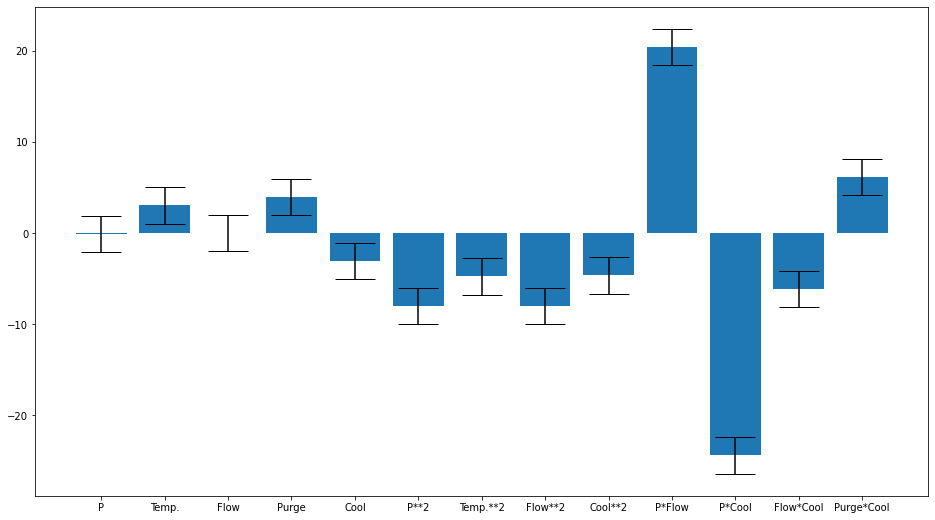

In [18]:
temp_tuple = doenut.autotune_model(
    inputs = sat_inputs_orig, 
    responses = responses[['Profit']],
    source_list = sat_source_list,
    remove_significant = True)
output_indices, new_model, predictions, ground_truth, coeffs, R2s, R2, Q2, R2_over_opt, Q2_over_opt, n_terms_over_opt, terms = temp_tuple

In [19]:
for x in terms:
    if len(x) == 10:
        print(x)

Text(0, 0.5, 'Correlation coefficient')

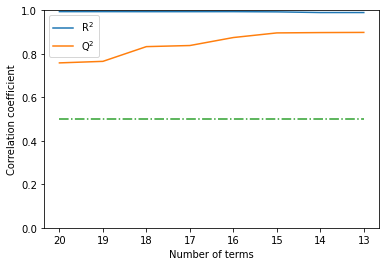

In [20]:
ax = plt.axes()
x_data = range(len(R2_over_opt))
plt.plot(x_data, R2_over_opt)
plt.plot(x_data, Q2_over_opt)
#plt.set_xlabels(n_terms_over_opt)
ax.set_xticks(x_data)
ax.set_xticklabels(n_terms_over_opt)
plt.legend(["R$^2$","Q$^2$"])
plt.ylim([0,1])
plt.plot([x_data[0],x_data[-1]],[0.5,0.5], '-.')
plt.xlabel('Number of terms')
plt.ylabel("Correlation coefficient")

In [21]:
input_selector = [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 18, 19]

In [22]:
responses['Profit']

0     10901.0
1    -12000.0
2     -5222.0
3     22675.0
4    -12000.0
5     54224.0
6     -3558.0
7     -6188.0
8      5264.0
9    -12000.0
10    -6395.0
11    14140.0
12   -12000.0
13    37206.0
14    -5727.0
15    -7225.0
16    25032.0
Name: Profit, dtype: float64

Input terms are ['P', 'Temp.', 'Flow', 'Purge', 'Cool', 'P**2', 'Temp.**2', 'Flow**2', 'Purge**2', 'Cool**2', 'P*Temp.', 'P*Flow', 'P*Purge', 'P*Cool', 'Temp.*Flow', 'Temp.*Purge', 'Temp.*Cool', 'Flow*Purge', 'Flow*Cool', 'Purge*Cool']
Input Responses are ['Profit']

Selected Response is Profit
Selected input terms:	['P', 'Temp.', 'Flow', 'Purge', 'Cool', 'P**2', 'Temp.**2', 'Flow**2', 'Cool**2', 'P*Flow', 'P*Cool', 'Flow*Cool', 'Purge*Cool']
Averaging replicates
Input data is 17 points long
We are using 17 data points
Left out data point 0:	R2 = 0.991	Ave. Error = -3.6e+03
Left out data point 1:	R2 = 0.99	Ave. Error = -7.37e+02
Left out data point 2:	R2 = 0.99	Ave. Error = 8.27e+02
Left out data point 3:	R2 = 0.99	Ave. Error = 2.6e+02
Left out data point 4:	R2 = 0.99	Ave. Error = -7.37e+02
Left out data point 5:	R2 = 0.997	Ave. Error = 1.16e+04
Left out data point 6:	R2 = 0.994	Ave. Error = -8.23e+03
Left out data point 7:	R2 = 0.99	Ave. Error = 6.46e+02
Left out data point 8:	R2 = 0.

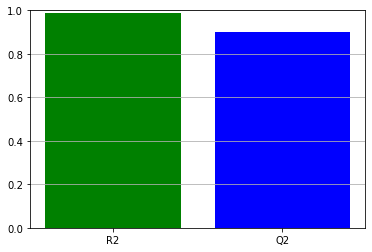

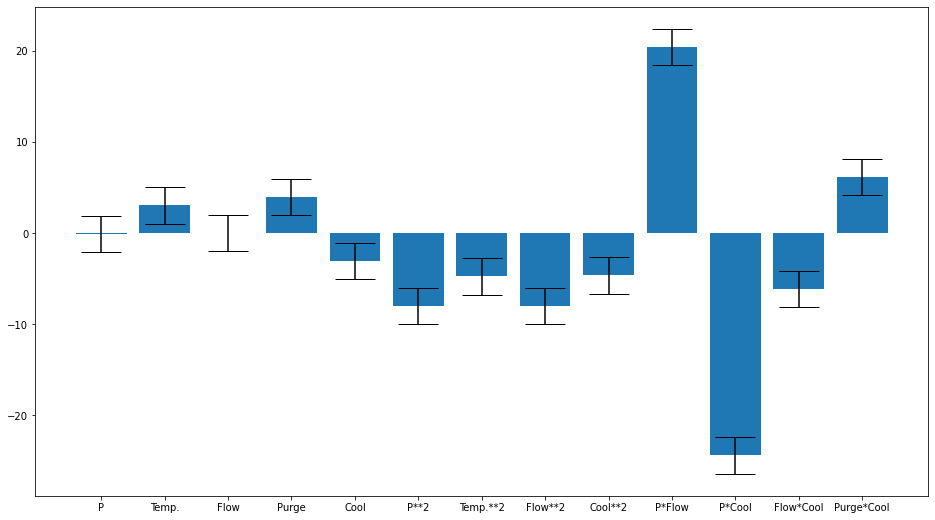

In [23]:
#input_selector = [20, 32, 74, 77, 100, 104, 212, 218, 277, 280, 285, 288, 296, 347]
this_model, R2, temp_tuple, _ = doenut.calulate_R2_and_Q2_for_models(
                        sat_inputs_orig, 
                        responses[['Profit']], 
                       # input_selector=[2,3,6,7], 
                        input_selector=input_selector, 
                        response_selector=[0],
                        use_scaled_inputs=True,
                        do_scaling_here=True)
new_model, predictions, ground_truth, coeffs, R2s, R2, Q2= temp_tuple

In [24]:
predictions

,Profit
0,14504.666667
1,-11263.333333
2,-6049.333333
3,22414.666667
4,-11263.333333
5,42653.000000
6,4669.666667
7,-6834.000000
8,1660.333333
9,-12736.666667


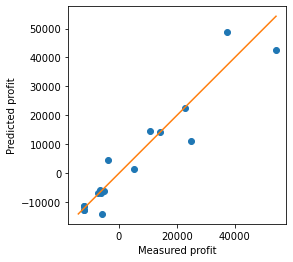

In [25]:
doenut.plot_observed_vs_predicted(responses['Profit'], 
                               predictions['Profit'],
                               range_x=[],
                               label='profit')

In [26]:
doenut.predict_from_model(this_model,
                   sat_inputs_orig,
                   input_selector)

(array([ 12252.37500025, -11723.74999973,  -5532.24999974,  22577.37500032,
        -11723.75000052,  49884.87499965,   -472.62500012,  -6430.25000037,
          3912.62500028, -12276.24999964,  -6084.74999965,  14237.62500036,
        -12276.25000043,  41545.12499968,  -8812.37500009,  -6982.75000028,
         25032.00000003]),
 ['P',
  'Temp.',
  'Flow',
  'Purge',
  'Cool',
  'P**2',
  'Temp.**2',
  'Flow**2',
  'Cool**2',
  'P*Flow',
  'P*Cool',
  'Flow*Cool',
  'Purge*Cool'])

In [ ]:

# PC4
#['PC2', 'PC3', 'PC4', 'PC3*2', 'PC4*2', 'PC2*PC3', 'PC3*PC4']

['P', 'Temp.', 'Flow', 'Purge', 'Cool', 
 'P**2', 'P*Flow', 'P*Cool', 'Flow*Cool', 'Purge*Cool']

purge_constant = 25
cooling_constant = 150

n_points = 60
def my_function(df_1):
    df_1['Purge']=np.linspace(purge_constant, purge_constant, 3600)
    df_1['Cool']=np.linspace(cooling_constant, cooling_constant, 3600)
    
    df_1['P**2'] = df_1['P']*df_1['P']
    df_1['Temp.**2'] = df_1['Temp.']*df_1['Temp.']
    df_1['Flow**2'] = df_1['Flow']*df_1['Flow']
    df_1['Cool**2'] = df_1['Cool']*df_1['Cool']   
    
    df_1['P*Flow'] = df_1['P']*df_1['Flow']
    df_1['P*Cool'] = df_1['P']*df_1['Cool']
    df_1['Flow*Cool'] = df_1['Flow']*df_1['Cool']
    df_1['Purge*Cool'] = df_1['Purge']*df_1['Cool']
    return df_1

x_key = 'P'
y_key='Temp.'
c_key="Flow"

doenut.four_D_contour_plot(
    unscaled_model=this_model,
    x_key=x_key,
    y_key=y_key,
    c_key=c_key,
    x_limits=[inputs[x_key].min(),inputs[x_key].max()], 
    y_limits=[inputs[y_key].min(),inputs[y_key].max()], 
    constants=[inputs[c_key].min(),29.7,inputs[c_key].max()], 
    n_points=60,
    my_function=my_function,
    fig_label='Exp. 1',    
    x_label='PC4',
    y_label='PC3',
    constant_label='PC2',
    z_label = 'Yield %',
    cmap='jet',
    num_of_z_levels=11,
    z_limits=[-100,100])

In [28]:
def my_function(df_1):
    """This function is for including the extra terms in your model
    This model has no extra terms so is an empty function"""
    pass
    return df_1

doenut.four_D_contour_plot(
    unscaled_model=original_model,
    x_key='Time',
    y_key='Temp',
    c_key='Eq',
    x_limits=[0.5,3.0], 
    y_limits=[30,70], 
    constants=[2,6,10], 
    n_points=60,
    my_function=my_function,
    fig_label='ortho',    
    x_label='Res. time / min',
    y_label='Temperature deg. C',
    constant_label='[2] Equiv.',
    z_label = 'Yield [5] %',
    cmap='jet',
    num_of_z_levels=11,
    z_limits=[0,100])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)